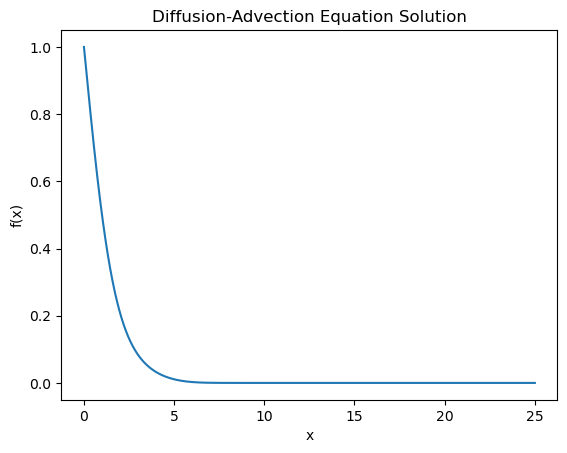

In [35]:
# The one-dimensional Diffusion-Advection equation is
# D (d^2f(x))/(dx^2) - d/dx (v(x)f(x)) = 0
# where v(x) is some velocity field that advects particles around. The first
# term is the diffusion term that tends to spread particles.

#Use a second order finite difference scheme to solve the diffusion-
#advection with D = 2 and v(x) = − sin x on [0, 25] with boundary
#conditions f(0) = 1 and f(25) = 0. Use N = 1000 grid points.

#a
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 2.0
N = 1000
L = 25.0
dx = L / N 
dt = 0.0001

# Velocity function
def velocity(x):
    return -np.sin(x)

# Initialize grid and solution arrays
x = np.linspace(0, L, N)
f = np.zeros(N)
f[0] = 1.0

# Time-stepping using finite difference scheme
steps = 10000
for step in range(steps):
    f_new = f.copy()
    for i in range(1, N-1):
        diffusion = D * (f[i + 1] - 2 * f[i] + f[i - 1]) / dx**2
        advection = velocity(x[i]) * (f[i + 1] - f[i - 1]) / (2 * dx)

        # subtract advection from diffusion, as in formula, while updating f_new
        f_new[i] = f[i] + dt * (diffusion - advection)
    f = f_new

# Plot the solution
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Diffusion-Advection Equation Solution')
plt.show()



In [36]:
#b
# It is always a good idea to ‘sanity check’ the result of a numerical solution.
# Explain the shape of f(x). Does it make sense compared to the
# physical interpretation of the diffusion-advection equation?

# We start with a high concentration, at x = 0 (1). 
# Over time, due to diffusion, the particles spread out and the concentration becomes smaller. 

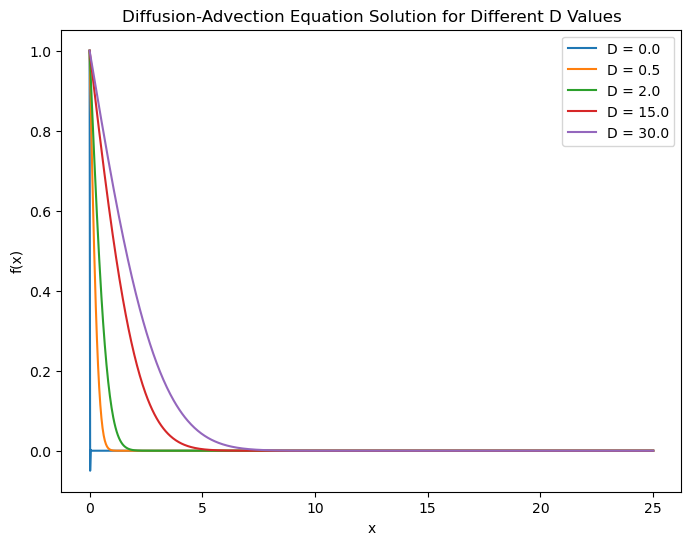

In [39]:
# c
# Explain what happens for D → 0 and D → ∞. Plot for instance
# D = 0.5 and D = 15 and compare to D = 2. Would your code work for
# D = 0?
dt = 0.00001
D_values = [0.0, 0.5, 2.0, 15.0, 30.0]

steps = 10000
plt.figure(figsize=(8, 6))

for D in D_values:
    f = np.zeros(N)
    f[0] = 1.0
    for step in range(steps):
        f_new = f.copy()
        for i in range(1, N-1):
            diffusion = D * (f[i + 1] - 2 * f[i] + f[i - 1]) / dx**2
            advection = velocity(x[i]) * (f[i + 1] - f[i - 1]) / (2 * dx)
    
            # subtract advection from diffusion, as in formula, while updating f_new
            f_new[i] = f[i] + dt * (diffusion - advection)
        f = f_new
    plt.plot(x, f, label=f'D = {D}')


plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Diffusion-Advection for Different D Values')
plt.legend()
plt.show()


# When D → ∞, the diffusion is the most dominant factor.
# When D → 0, the diffusion becomes negligible.
# Diffusion is slower than advection with the velocity field?